# Handle multidimensional morphological data

In [2]:
%load_ext autoreload
%autoreload 2

import yaml


In [3]:
# parse config file
with open('../config.yml', 'r') as f:
    cfg = yaml.safe_load(f)

input = cfg['input']
output = cfg['output']

In [1]:
from morphelia.tools import MorphData
from morphelia.preprocessing import pseudostitch
from morphelia.time_series import trace, show_trace
from morphelia.time_series import temporal_reduction

In [4]:
md = MorphData()

md = md.from_csv(exp=input, files=["Cells.txt"], obj_delimiter="\t",
                        treat_file="Treatment.csv").to_anndata()

md

Reading Morphome Data from CSV...


C:\Users\amarx\Anaconda3\envs\morphelia_env\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 38305 × 407
    obs: 'BatchNumber', 'PlateNumber', 'ImageNumber', 'ObjectNumber', 'Metadata_Col', 'Metadata_Field', 'Metadata_FileLocation', 'Metadata_Frame', 'Metadata_Row', 'Metadata_Series', 'Metadata_Well', 'Cells_AreaShape_BoundingBoxArea', 'Cells_AreaShape_BoundingBoxMaximum_X', 'Cells_AreaShape_BoundingBoxMaximum_Y', 'Cells_AreaShape_BoundingBoxMinimum_X', 'Cells_AreaShape_BoundingBoxMinimum_Y', 'Cells_AreaShape_Center_X', 'Cells_AreaShape_Center_Y', 'Cells_AreaShape_EulerNumber', 'Cells_Location_CenterMassIntensity_X_CalceinAM', 'Cells_Location_CenterMassIntensity_Y_CalceinAM', 'Cells_Location_CenterMassIntensity_Z_CalceinAM', 'Cells_Location_Center_X', 'Cells_Location_Center_Y', 'Cells_Location_Center_Z', 'Cells_Location_MaxIntensity_X_CalceinAM', 'Cells_Location_MaxIntensity_Y_CalceinAM', 'Cells_Location_MaxIntensity_Z_CalceinAM', 'Cells_Neighbors_FirstClosestObjectNumber_20', 'Cells_Neighbors_FirstClosestObjectNumber_Adjacent', 'Cells_Nei

In [7]:
md_traced = trace(md)

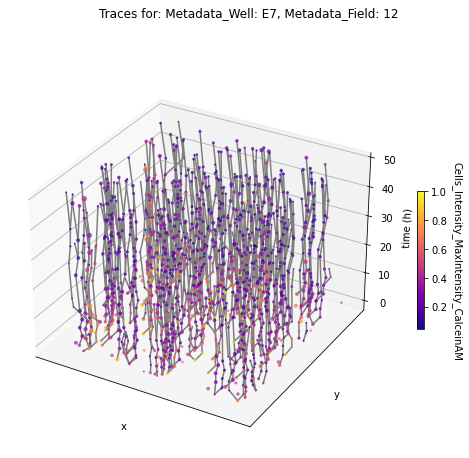

In [93]:
show_trace(md, dim='3d', fields={"Metadata_Well": ["E7"], "Metadata_Field": [12]},
           size="Cells_AreaShape_Area",
           color="Cells_Intensity_MaxIntensity_CalceinAM")

In [7]:

tr = temporal_reduction(md)

In [12]:
from morphelia.preprocessing import aggregate, subsample

agg = aggregate(md)
ss = subsample(md)

C:\Users\amarx\Anaconda3\envs\morphelia\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [34]:
ss.obs = trace(ss.obs)

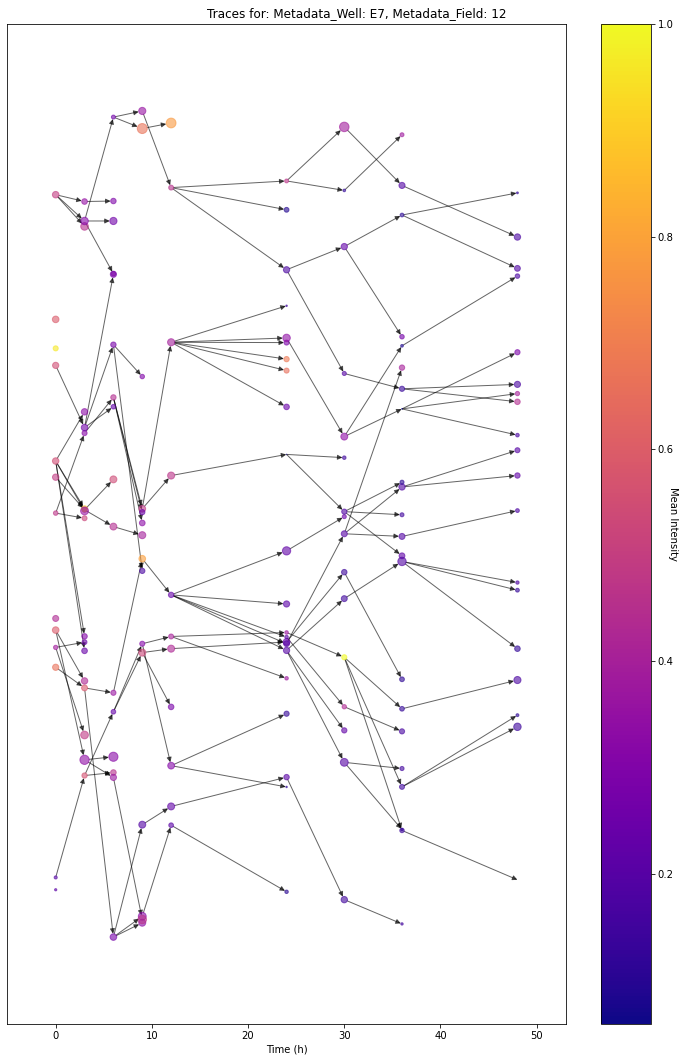

In [35]:
show_trace(ss.obs, fields={"Metadata_Well": ["E7"], "Metadata_Field": [12]},
           node_size=ss[:, "Cells_AreaShape_Area"].X,
           node_color=ss[:, "Cells_Intensity_MaxIntensity_CalceinAM"].X,
           color_label="Mean Intensity")

(<Figure size 1080x504 with 2 Axes>, <AxesSubplot:>)

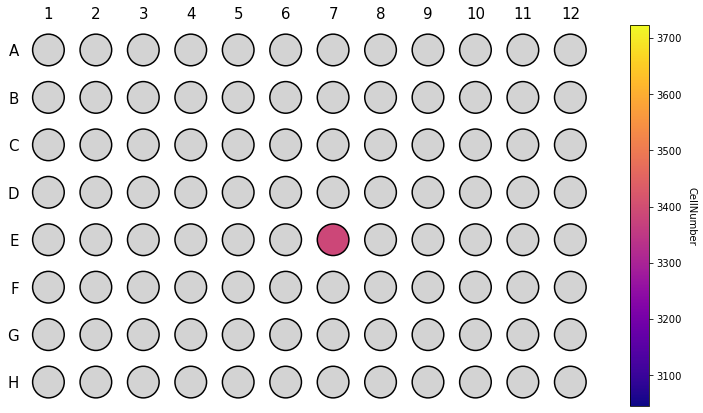

In [7]:
from morphelia.plotting import qc_plot

qc_plot(agg, wells=96, select={'PlateNumber': 2}, color="CellNumber")

(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:xlabel='Metadata_Time', ylabel='Cells_AreaShape_Area'>,
        <AxesSubplot:xlabel='Metadata_Time', ylabel='Cells_Texture_Variance_CalceinAM_10_03_256'>],
       dtype=object))

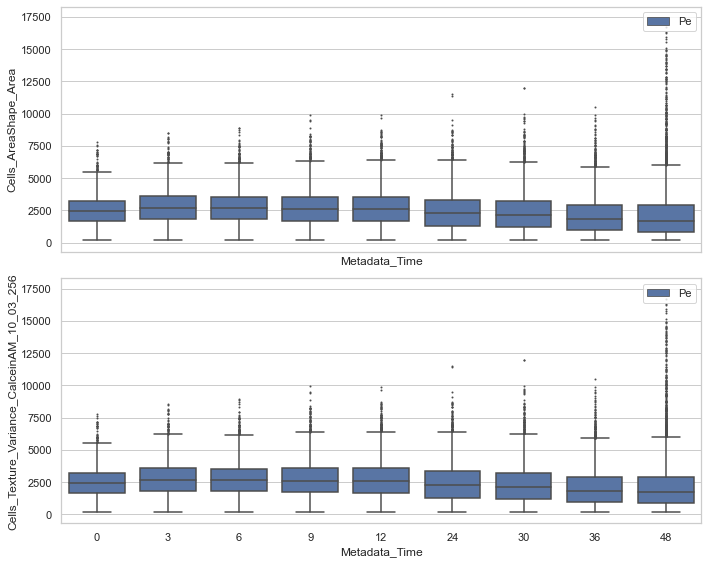

In [90]:
from morphelia.plotting import boxplot

boxplot(md, x="Metadata_Time", y=["Cells_AreaShape_Area", 'Cells_Texture_Variance_CalceinAM_10_03_256'], hue="Metadata_Treatment")

(<Figure size 720x432 with 2 Axes>,
 array([<AxesSubplot:xlabel='Metadata_Time', ylabel='Cells_AreaShape_Area'>,
        <AxesSubplot:xlabel='Metadata_Time', ylabel='Cells_Texture_Variance_CalceinAM_10_03_256'>],
       dtype=object))

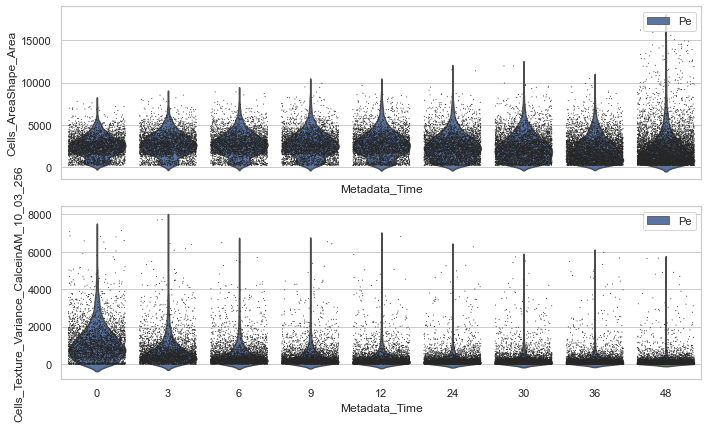

In [89]:
from morphelia.plotting import violin

violin(md, x="Metadata_Time", y=["Cells_AreaShape_Area", 'Cells_Texture_Variance_CalceinAM_10_03_256'],
       hue="Metadata_Treatment", jitter=0.4)
